In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load data

In [2]:
eng = pd.read_csv('takehome_user_engagement.csv')
eng['time_stamp'] = pd.to_datetime(eng['time_stamp'])

In [3]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s', origin='unix')

# Merge data

In [4]:
# merge two datasets
df = eng.merge(users, left_on='user_id', right_on='object_id', how='left')

# drop duplicated columns
df = df.drop('object_id', axis=1)
df

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   creation_time               207917 non-null  datetime64[ns]
 4   name                        207917 non-null  object        
 5   email                       207917 non-null  object        
 6   creation_source             207917 non-null  object        
 7   last_session_creation_time  207917 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    207917 non-null  int64         
 9   enabled_for_marketing_drip  207917 non-null  int64         
 10  org_id                      207917 non-null  int64         
 11  invited_by_user_id          116887 non-

- There are a lot of missing values in invited_by_user_id.

# Define adopted

In [6]:
# define and search and find adopted
for id in df['user_id'].unique():
    df_id = df[df['user_id']==id].sort_values('time_stamp')
    df_id = df_id.set_index('time_stamp')
    df_id = df_id['visited']
    if  np.amax(df_id.rolling('7D').sum()) < 3:
        df.loc[df['user_id']==id, 'adopted'] = 0
    else:
        df.loc[df['user_id']==id, 'adopted'] = 1

In [7]:
df

,time_stamp,user_id,visited,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,2013-11-29 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-12-09 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
4,2013-12-25 03:45:04,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0
207913,2013-01-15 18:28:37,11997,1,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,0.0
207914,2014-04-27 12:45:16,11998,1,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0
207915,2012-06-02 11:55:59,11999,1,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,0.0


In [9]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207916 entries, 0 to 207915
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207916 non-null  datetime64[ns]
 1   user_id                     207916 non-null  int64         
 2   visited                     207916 non-null  int64         
 3   creation_time               207916 non-null  datetime64[ns]
 4   name                        207916 non-null  object        
 5   email                       207916 non-null  object        
 6   creation_source             207916 non-null  object        
 7   last_session_creation_time  207916 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    207916 non-null  int64         
 9   enabled_for_marketing_drip  207916 non-null  int64         
 10  org_id                      207916 non-null  int64         
 11  invited_by_user_id          116887 non-

# Data preprocessing

In [10]:
# drop features that are not important
df = df.drop(['name', 'email', 'visited', 'time_stamp', 'creation_time', 'last_session_creation_time'], axis=1)

# drop duplicates
df = df.drop_duplicates()

# set index
df = df.set_index(['user_id'])

In [11]:
# impute missing values
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(strategy='most_frequent')
df[['invited_by_user_id']] = imp_mf.fit_transform(df[['invited_by_user_id']])

In [12]:
# one-hot encoding
df[['org_id', 'invited_by_user_id']]= df[['org_id', 'invited_by_user_id']].astype('category')
df = pd.get_dummies(df)

In [13]:
df

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,...,invited_by_user_id_11961.0,invited_by_user_id_11966.0,invited_by_user_id_11972.0,invited_by_user_id_11973.0,invited_by_user_id_11978.0,invited_by_user_id_11981.0,invited_by_user_id_11986.0,invited_by_user_id_11994.0,invited_by_user_id_11997.0,invited_by_user_id_11999.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11996,0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df.drop(['adopted'], axis=1)
y = df['adopted']

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# class weight is not considered
clf = LogisticRegression(penalty='l2', max_iter=300, random_state=42).fit(X_scaled, y)
print('The mean accuracy:', clf.score(X_scaled, y))
y_pred = clf.predict(X_scaled)
print(classification_report(y, y_pred))

The mean accuracy: 0.8598957152573112
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      7220
         1.0       0.77      0.32      0.46      1602

    accuracy                           0.86      8822
   macro avg       0.82      0.65      0.69      8822
weighted avg       0.85      0.86      0.84      8822



- The number of posite class is about 4 times less than the negative class. This imbalance would have an impact on the scores. 
- Recall of positive class is 0.32 that is quite low.
- However, the weighted average of recall that takes into account of both class is 0.86, indicating the model is good.
- The mean accuracty of 0.86 indicates the model is doing ok.

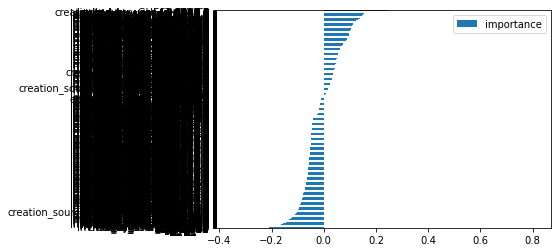

In [36]:
feature_importance = pd.DataFrame(data=clf.coef_.T, index=X.columns, columns = ['importance'])
feature_importance = feature_importance.sort_values('importance')
feature_importance.plot(kind='barh')

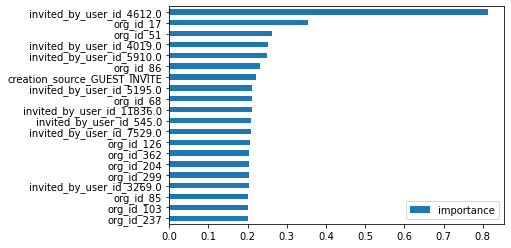

In [41]:
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values('importance')
feature_importance.iloc[-20:].plot(kind='barh')

In [38]:
# top important features
feature_importance = feature_importance.sort_values('importance', ascending=False)
feature_importance.head(20)

,importance
invited_by_user_id_4612.0,0.813033
org_id_17,0.353341
org_id_51,0.263376
invited_by_user_id_4019.0,0.251248
invited_by_user_id_5910.0,0.250079
org_id_86,0.232004
creation_source_GUEST_INVITE,0.221418
invited_by_user_id_5195.0,0.210816
org_id_68,0.210496
invited_by_user_id_11836.0,0.210473


- The most important features have to do with certain organizations they belong to and by whom they are invited.
- The creation source of GUEST_INVITE is much more important than other kinds.

In [39]:
# least important features
feature_importance.tail(20)

,importance
org_id_27,0.004035
org_id_143,0.003874
opted_in_to_mailing_list,0.003801
org_id_390,0.003606
org_id_61,0.003469
org_id_20,0.003051
invited_by_user_id_2308.0,0.002823
org_id_313,0.002760
invited_by_user_id_1879.0,0.001837
org_id_208,0.001394


- The above are the least important features.

Two problems arise. First, the sample size is small. Second, there is severe class imbalance. Since the sample size is determined by the number of users, there is no way to increase that. To overcome the imbalance, one can use bootstrap method to duplicate the less popular class or to randomly drop some samples from populated class.